### Brief Overview 
This project aims to determine the housing prices of California properties for new sellers and also for buyers to estimate the profitability of the deal. This is a supervised multivariate regression problem that aims to predict the prices of houses based on multiple input features.

### Define the problem
The housing prices in most of the developing countries are currently estimated manually by experts consists of a team gathers up-to-date information about a particular district/sector,  and  they  use  complex  rules  to  come  up  with  an  estimate.  This  is costly and time-consuming, and their estimates are not great; their typical error rate is quite high. Therefore there is need of a model which can automatically predicts the prices of housing in any area or city by feeding data of housing prices.

### Objectives
1. To understand what factors contributed most to housing prices.
2. To perform clustering to find any meaningful patterns of housing prices.
3. To determine the housing prices of California properties for new sellers and also for buyers to estimate the profitability of the deal.

The implementation of this model will allow management to create better decision-making actions.

### Define Variables
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea


In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import interp
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import KFold
from sklearn import metrics, model_selection
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import scipy.stats as stats
%matplotlib inline

In [76]:
df=pd.read_csv(r"C:\Users\Ishant\Desktop\Data_files\housing_market.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
print("Description:\n")
print(df.describe())

Description:

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%   

In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [114]:
df = df.dropna(subset=["total_bedrooms"], axis=0)

In [115]:
df.shape

(20433, 18)

### EXPLORATORY DATA ANALYSIS

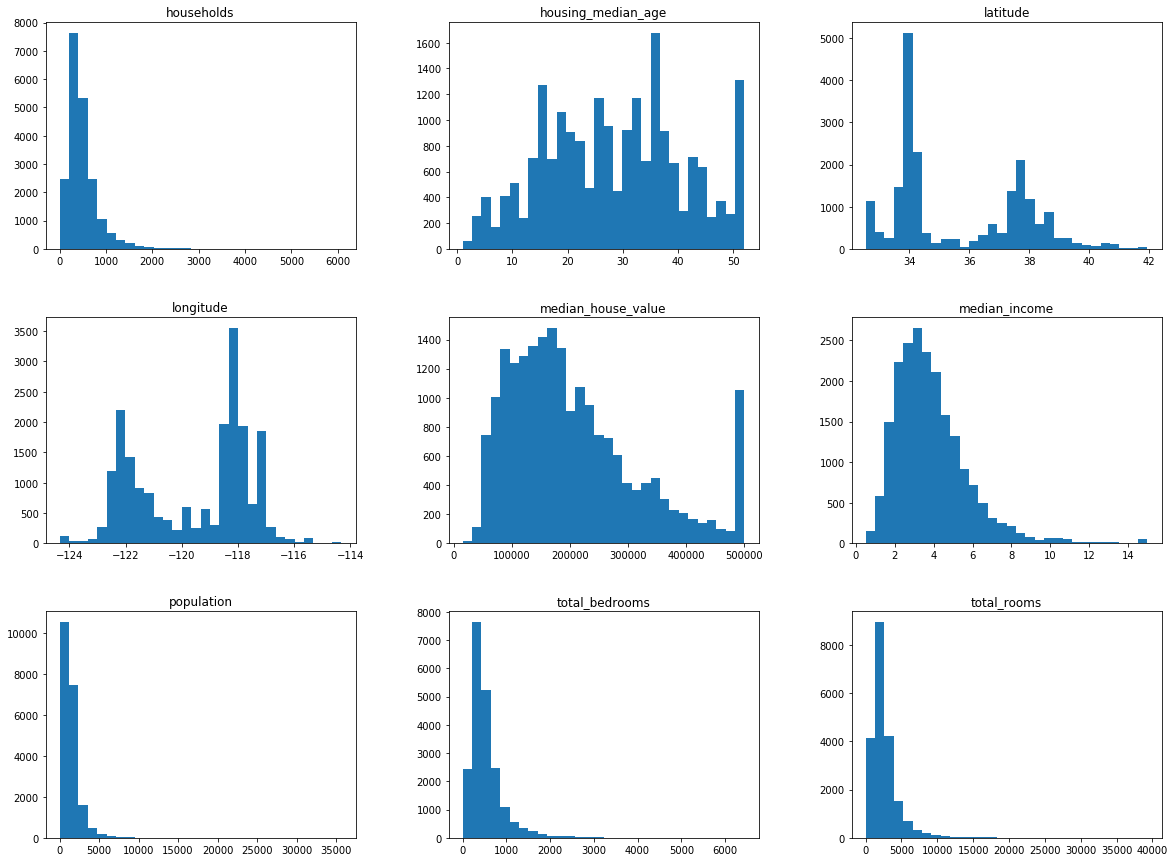

In [16]:
df.hist(bins=30, figsize=(20,15), grid=False)
plt.show()

**Observations:** 
1. Median income attribute does not look like it is expressed in US dollars. The data is scaled and capped for median income at 15 for higher income median and 0.5 scaled for lower income median. Working with preprocessed attribute is common in machine learning. It is important to understand how the data was computed.

2. The housing median age and the median house value were also capped. The former might not be a problem but latter may be a serious problem since it is your target attribute. ML model may learn that prices never go beyond that limit. In that case, we need to decide that do we need precise predictions beyond 500000 or not.

3. Most histograms are tail heavy. They extend right of the median than to the left. However, we can normalize these features by using scaling packages.

In [116]:
df["income_cat"] = np.ceil(df["median_income"] / 1.5)
df["income_cat"].where(df["income_cat"] < 5, 5.0, inplace=True)

F:\Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
F:\Softwares\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


**Note:** As per previous literature median_household_income is an important attribute for predicting housing prices. Since the median income is a continuous numerical attribute, you first need to create an income as a category attribute. Because, it is important to restrict too many stratas. Above code creates an income category attribute by dividing the median income by 1.5 (to limit the number of income categories), and rounding up using ceil (to have discrete categories), and then merging all the categories greater than 5 into category 5.

In [117]:
df["income_cat"].value_counts()

3.0    7156
2.0    6515
4.0    3611
5.0    2337
1.0     814
Name: income_cat, dtype: int64

**Note:** As the dataset is skewed to the right (positively skewed), we use stratified sampling to ensure the we have equal distribution of samples in both the test and train dataset.

#### --- Relation between latitude, logitude, population with median_house_value--- 

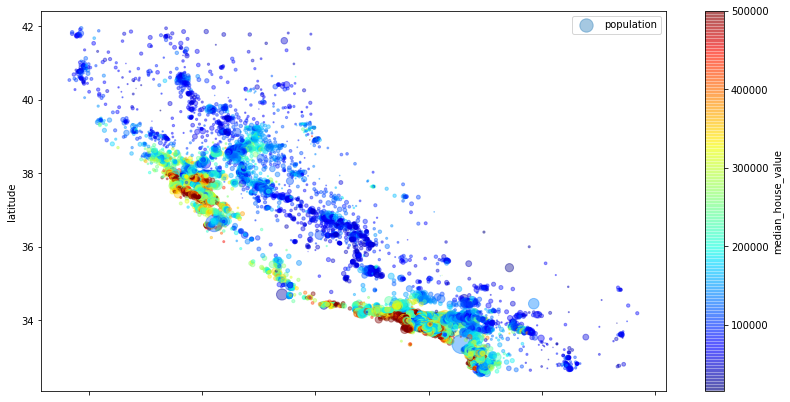

In [45]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), figsize=(14,7), colorbar=True)
plt.xlabel("longitude")
plt.legend()

**Observation:** Population around bayarea of Los Angeles and San Diego are quite high whereas population density in Inland area around Sacramento and Frensco are also high.

Text(0.5, 1.0, 'Skewness Check')

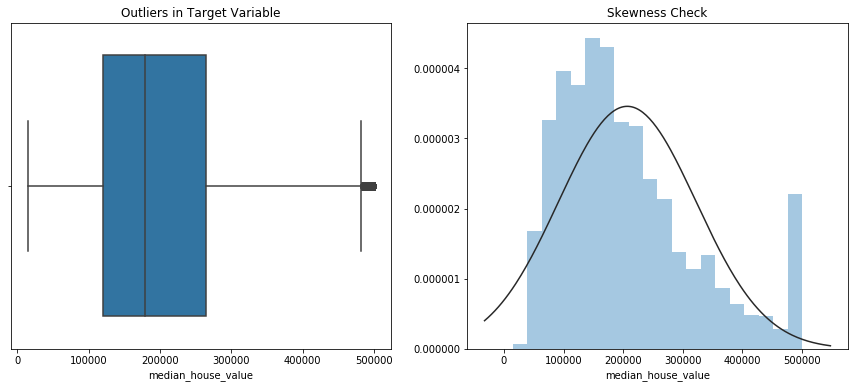

In [50]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(df.median_house_value)
plt.title("Outliers in Target Variable")
plt.subplot(1,2,2)
sns.distplot(df.median_house_value, bins=20, kde=False, fit=stats.norm)
plt.title("Skewness Check")

#### --- Relation between numerical features and target variable---

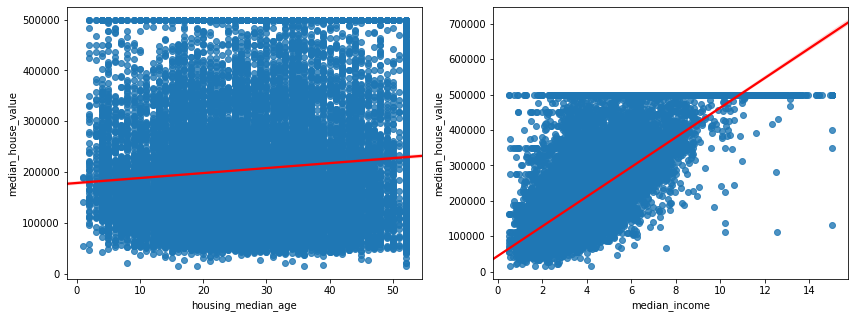

In [62]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.regplot(x="housing_median_age", y="median_house_value", line_kws={"color":"r"}, data=df)
plt.subplot(1,2,2)
sns.regplot(x="median_income", y="median_house_value", line_kws={"color":"r"}, data=df)

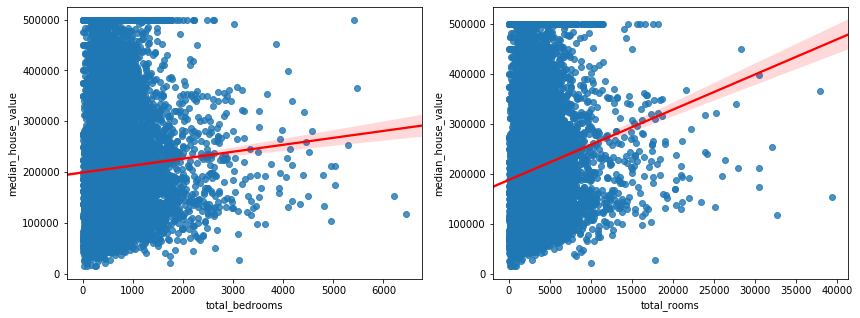

In [61]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.regplot(x="total_bedrooms", y="median_house_value", line_kws={"color":"r"}, data=df)
plt.subplot(1,2,2)
sns.regplot(x="total_rooms", y="median_house_value", line_kws={"color":"r"}, data=df)

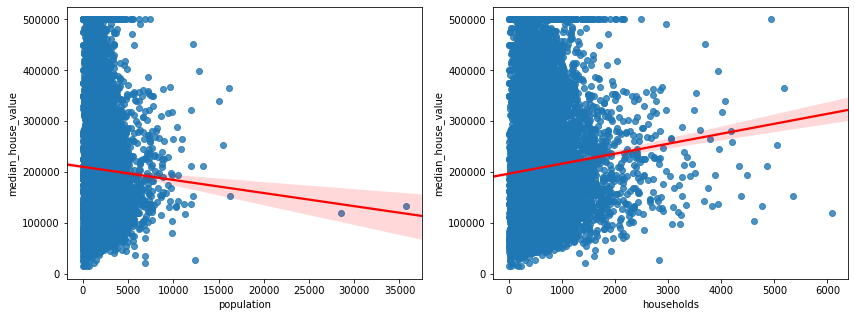

In [60]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.regplot(x="population", y="median_house_value", line_kws={"color":"r"}, data=df)
plt.subplot(1,2,2)
sns.regplot(x="households", y="median_house_value", line_kws={"color":"r"}, data=df)

**Observations:** 
1. Data is quite spreaded out in above figures. However, house_value has strong positive correlation with median_income and slight positive correlation with other features whereas population has negative correlation with house_value with high dispersion.

2. Price cap we noticed erarlier is clearly visible in plots (1,2,1) as a horizontal line and (1,2,2) as avertical line.

#### --- Relation between categorical features and target variable---

In [64]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

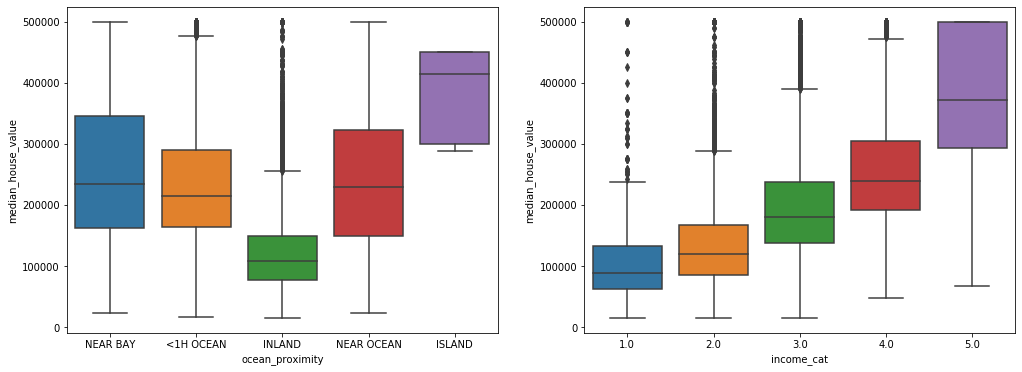

In [78]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.boxplot(x="ocean_proximity", y="median_house_value", data=df)
plt.subplot(1,2,2)
sns.boxplot(x="income_cat", y="median_house_value", data=df)

**Observations:** Each category in ocean_proximity provide slight difference in median household value whereas income category shows a significant difference in house value.

In [118]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

F:\Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
F:\Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

**Explaination:** Before preparing the data for Machine Learning algorithms, there is need to try out various attribute combinations. For example, the total number of rooms in a district is not very useful if we don’t know how many households there are. What we really want is the number of rooms per household. Similarly,  the  total  number  of  bedrooms  by  itself  is  not  very  useful: we  probably want to compare it to the number of rooms. And the population per household also seems  like an interesting attribute combination to check.

In [119]:
df=pd.get_dummies(df)

In [120]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,-0.010733,-0.027307,0.092657,0.002304,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.085623,0.106423,-0.113815,0.002522,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.145784,-0.153031,0.136089,0.013258,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.219996,0.133482,-0.187900,-0.024596,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.015662,0.001538,0.084238,-0.028355,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.025849,-0.071898,0.035319,0.070062,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.038600,-0.080165,0.065087,-0.027336,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.902842,0.325307,-0.615661,0.018894,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.643941,0.151344,-0.255880,-0.023639,0.257614,-0.484787,0.023525,0.160526,0.140378
income_cat,-0.010733,-0.085623,-0.145784,0.219996,0.015662,0.025849,0.038600,0.902842,0.643941,1.000000,0.311587,-0.628541,0.009692,0.179973,-0.241262,-0.011970,0.051420,0.020893


**Observation:** The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive. The number of rooms per household is also more informative than the total number of rooms in a district—obviously the larger the number of rooms per household, the more expensive they are.

In [138]:
x=df.drop(["median_house_value"], axis=1)
y=df["median_house_value"]

In [139]:
z=x.drop(["income_cat","ocean_proximity_<1H OCEAN","ocean_proximity_INLAND","ocean_proximity_ISLAND","ocean_proximity_NEAR BAY","ocean_proximity_NEAR OCEAN"], axis=1)
z=preprocessing.StandardScaler().fit_transform(z.astype(np.float64))
print(z.shape)
z

(20433, 11)


array([[-1.32731375,  1.05171726,  0.98216331, ...,  0.62539465,
        -1.1460242 , -0.04943252],
       [-1.32232256,  1.04235526, -0.60621017, ...,  0.3249418 ,
        -0.98725423, -0.09213353],
       [-1.33230494,  1.03767426,  1.85576873, ...,  1.15059359,
        -1.44051403, -0.02579734],
       ...,
       [-0.82320322,  1.77727236, -0.92388486, ..., -0.09094308,
         0.03680837, -0.07145974],
       [-0.87311515,  1.77727236, -0.84446619, ..., -0.04101319,
         0.11820445, -0.09085289],
       [-0.83318561,  1.74918635, -1.00330353, ..., -0.07113779,
         0.14049521, -0.04354772]])

In [140]:
u=df[["ocean_proximity_<1H OCEAN","ocean_proximity_INLAND","ocean_proximity_ISLAND","ocean_proximity_NEAR BAY","ocean_proximity_NEAR OCEAN"]]
u=u.to_numpy()
u.shape

(20433, 5)

In [141]:
x=np.concatenate((z, u), axis=1)

In [142]:
train_x, test_x, train_y, test_y=train_test_split(x, y, test_size=0.2, random_state=42, stratify=df["income_cat"])
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(16346, 16)
(16346,)
(4087, 16)
(4087,)


#### ---Linear Regression---
I am using a simple linear regression model as a baseline model so that this model can helps to understand the trends better and further we will see how feature engineering works on the model.

In [143]:
lr=LinearRegression(fit_intercept=True)

In [145]:
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
def Linear_Model(lr,X,Y,kind):
    print("Validating the model on "+kind+".....")
    
    y_pre=lr.predict(X)
    
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.regplot(x=Y, y=y_pre,line_kws={"color":"r"})
    plt.xlabel("Actual Value")
    plt.ylabel("Predicted Value")
    
    plt.subplot(1,2,2)
    sns.distplot(Y - y_pre,bins=20)
    plt.title("Error Plot")
    plt.show
    
    #5 Fold Cross Validation
    cv_score = cross_val_score(lr, X, Y, cv=5)
    print("\n",cv_score,"\n")
    print("\n  5-Fold Cross Validation on "+kind, (np.mean(cv_score)))
    
    # MSE - 
    print('\n MSE on '+kind, mean_squared_error(Y, y_pre))
    print('\n RMSE on '+kind, np.sqrt(mean_squared_error(Y, y_pre)))
    

Validating the model on train_data.....

 [0.66290679 0.63892872 0.65154095 0.61964807 0.66676426] 


  5-Fold Cross Validation on train_data 0.6479577564845458

 MSE on train_data 4656756560.696904

 RMSE on train_data 68240.43200842815


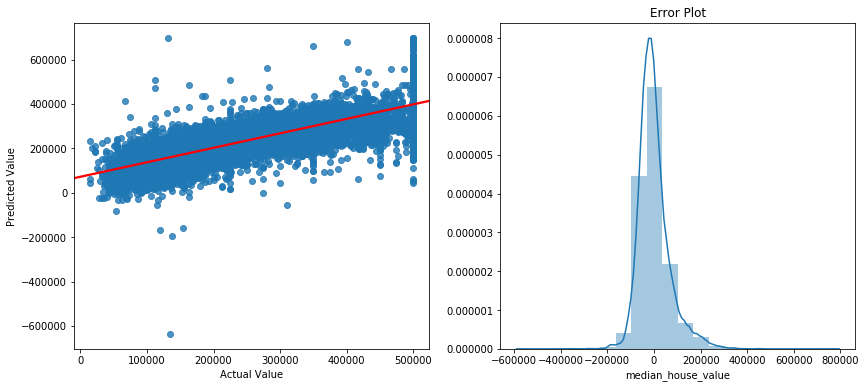

In [151]:
df_tr=Linear_Model(lr, train_x, train_y, "train_data")

In [152]:
poly_trans=PolynomialFeatures(degree=2, interaction_only=True)
x_tr_poly=poly_trans.fit_transform(train_x)
x_ts_poly=poly_trans.fit_transform(test_x)

Validating the model on Train Data Polynomial Transformed.....

 [ 0.69671188 -2.78838835  0.70454044  0.60949231  0.7236557 ] 


  5-Fold Cross Validation on Train Data Polynomial Transformed -0.01079760441109765

 MSE on Train Data Polynomial Transformed 3741523567.1964145

 RMSE on Train Data Polynomial Transformed 61167.994631150155


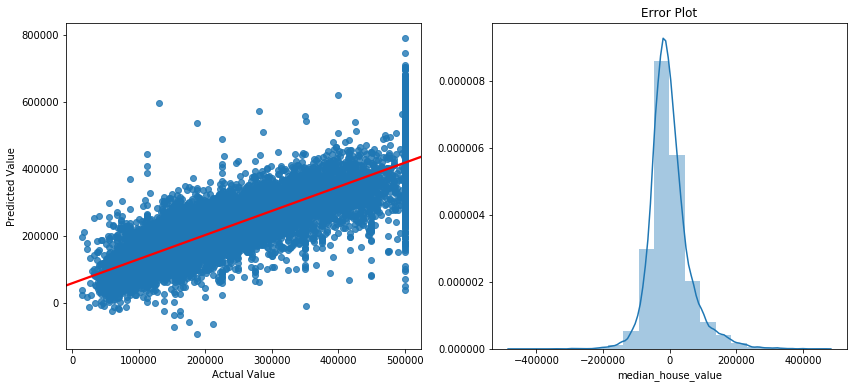

In [158]:
poly_lr = LinearRegression()
poly_lr.fit(x_tr_poly, train_y)
#p1=poly_lr
Linear_Model(poly_lr,x_tr_poly,train_y,"Train Data Polynomial Transformed")

#### ---Random Forest Regressor---
Now lets see if the prediction improves with a tree model such as Random Forest. I will be hand tuning the hyperparmetering and will use grid search to fine tune it. Now lets see if the prediction improves with a tree model such as Random Forest.

In [185]:
RFR=RandomForestRegressor(random_state=42)
RFR.fit(train_x, train_y)

F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [188]:
y_hat=RFR.predict(train_x)
MSE_Err=mean_squared_error(y_hat,train_y)
RMSE=np.sqrt(MSE_Err)
RMSE

22446.45384999001

**Observation:** The Random Forest Regressor model provides the best result of RMSE  22446.5 dollars on training data. Therefore we should use RFR out of all the above models used.

In [189]:
def plot_hyper(hyper_list,mse_err_tr,mse_err_ts,hyper_kind):
    plt.plot(hyper_list, mse_err_tr, label='Train Set')
    plt.plot(hyper_list, mse_err_ts, label='Test Set')
    plt.xlabel(hyper_kind)
    plt.ylabel('MSE Score')
    plt.title('Train VS Test Scores')
    plt.legend(loc="center right")
    plt.show()
    print("Minimun MSE for "+hyper_kind+" is: ",hyper_list[mse_err_ts.index(min(mse_err_ts))])

F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :1
MSE score on train: 9145100578.62818
MSE score on test: 8943775762.699095


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :5
MSE score on train: 4010556629.474556
MSE score on test: 4122873954.383063


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :10
MSE score on train: 1853714996.8615396
MSE score on test: 2796142157.0666423


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :11
MSE score on train: 1545518464.481778
MSE score on test: 2714368898.213353


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :12
MSE score on train: 1293568861.3034008
MSE score on test: 2654325604.763772


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :13
MSE score on train: 1074034992.643524
MSE score on test: 2644485823.1705093


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :14
MSE score on train: 911724188.317347
MSE score on test: 2613516054.669433


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :15
MSE score on train: 775267594.7565815
MSE score on test: 2588073936.5973005


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :16
MSE score on train: 678227462.0970476
MSE score on test: 2619930648.280903


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :17
MSE score on train: 611552889.7814003
MSE score on test: 2599137165.2004986


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :20
MSE score on train: 520286188.0130352
MSE score on test: 2613227532.3291087


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :25
MSE score on train: 493173909.3211182
MSE score on test: 2600966969.4110107


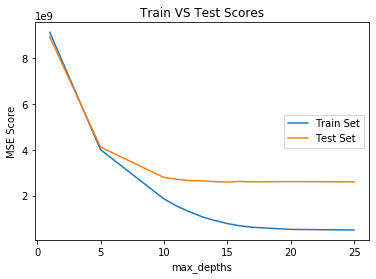

Minimun MSE for max_depths is:  15


In [190]:
max_depths = [1, 5, 10, 11, 12, 13, 14, 15, 16, 17, 20, 25]
mse_err_tr=[]
mse_err_ts=[]

for md in max_depths:
    rf=RandomForestRegressor(max_depth=md,random_state=44,n_jobs=-1)
    rf.fit(train_x, train_y)
    print("Maximum depth  :"+str(md))
    
    #on train data
    rf_predict=rf.predict(train_x)
    Err=mean_squared_error(train_y,rf_predict)
    print("MSE score on train: "+str(Err))
    mse_err_tr.append(Err)
    
    #on test data
    rf_predict=rf.predict(test_x)
    Err=mean_squared_error(test_y,rf_predict)
    print("MSE score on test: "+str(Err))
    mse_err_ts.append(Err)
    
    
plot_hyper(max_depths,mse_err_tr,mse_err_ts,"max_depths")

F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :1
MSE score on train: 775267594.7565815
MSE score on test: 2588073936.5973005


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :5
MSE score on train: 1334123222.5048826
MSE score on test: 2555580696.478015


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :10
MSE score on train: 1812432710.1405733
MSE score on test: 2606019179.810118


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :20
MSE score on train: 2293654812.3832865
MSE score on test: 2777674564.8360333


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :30
MSE score on train: 2544943942.2441087
MSE score on test: 2887859741.6809435


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :40
MSE score on train: 2726617518.978437
MSE score on test: 2998551025.1615524


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :50
MSE score on train: 2865326312.312004
MSE score on test: 3117850190.8343825


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :70
MSE score on train: 3118455670.342337
MSE score on test: 3302704608.922784


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :90
MSE score on train: 3297277918.8188753
MSE score on test: 3444006489.4377165


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :100
MSE score on train: 3371939647.574302
MSE score on test: 3498152561.0238123


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :120
MSE score on train: 3499723628.911818
MSE score on test: 3619361092.3566523


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :140
MSE score on train: 3615022515.807637
MSE score on test: 3695623468.317895


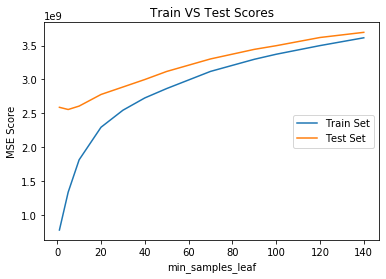

Minimun MSE for min_samples_leaf is:  5


In [192]:
min_samples_leaf = [1,5, 10, 20,30,40,50,70,90,100,120,140]
mse_err_tr=[]
mse_err_ts=[]

for msl in min_samples_leaf:
    rf=RandomForestRegressor(max_depth=15,min_samples_leaf=msl,random_state=44,n_jobs=-1)
    rf.fit(train_x,train_y)
    print("min_samples_leaf  :"+str(msl))
    
    #on train data
    rf_predict=rf.predict(train_x)
    Err=mean_squared_error(train_y,rf_predict)
    print("MSE score on train: "+str(Err))
    mse_err_tr.append(Err)
    
    #on test data
    rf_predict=rf.predict(test_x)
    Err=mean_squared_error(test_y,rf_predict)
    print("MSE score on test: "+str(Err))
    mse_err_ts.append(Err)
    
plot_hyper(min_samples_leaf,mse_err_tr,mse_err_ts,"min_samples_leaf")

In [233]:
max_features = ['auto', 'sqrt','log2', None, .1, .2, .3, .4, .5, .6, .7, .8, .9]
mse_err_tr=[]
mse_err_ts=[]
for mf in max_features:
    rf=RandomForestRegressor(max_depth=15,min_samples_leaf=5,max_features=mf,random_state=44,n_jobs=-1)
    rf.fit(train_x,train_y)
    print("max_features  :"+str(mf))
    
    #on train data
    rf_predict=rf.predict(train_x)
    Err=mean_squared_error(train_y,rf_predict)
    print("MSE score on train: "+str(Err))
    mse_err_tr.append(Err)
    
    #on test data
    rf_predict=rf.predict(test_x)
    Err=mean_squared_error(test_y,rf_predict)
    print("MSE score on test: "+str(Err))
    mse_err_ts.append(Err)

F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :auto
MSE score on train: 1334123222.5048826
MSE score on test: 2555580696.4780145


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :sqrt
MSE score on train: 1573196799.967895
MSE score on test: 2657841828.1117525


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :log2
MSE score on train: 1573196799.9678953
MSE score on test: 2657841828.111753


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :None
MSE score on train: 1334123222.5048826
MSE score on test: 2555580696.478015
max_features  :0.1


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MSE score on train: 4488618877.380954
MSE score on test: 5320610241.641382


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :0.2
MSE score on train: 1715216176.7277493
MSE score on test: 2902645345.0528812


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :0.3
MSE score on train: 1573196799.9678953
MSE score on test: 2657841828.1117525


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :0.4
MSE score on train: 1405312199.6024184
MSE score on test: 2497020403.2658076


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :0.5
MSE score on train: 1421435474.2319298
MSE score on test: 2585618215.686915


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :0.6
MSE score on train: 1389360117.1899078
MSE score on test: 2562345333.346668


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :0.7
MSE score on train: 1331713973.711415
MSE score on test: 2488319471.5614133


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :0.8
MSE score on train: 1309693673.3445635
MSE score on test: 2541663257.0889482


F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :0.9
MSE score on train: 1333568230.8004305
MSE score on test: 2516228834.4337006


Text(0.5, 1.0, 'Maximum Features Allowed Accuracies')

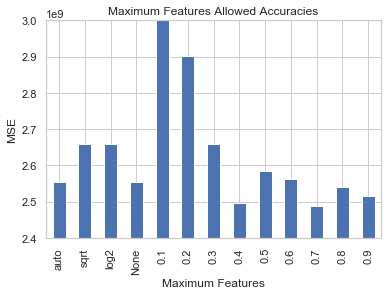

In [236]:
max_features_result = pd.Series(mse_err_ts, index=max_features)
ax = max_features_result.plot.bar(ylim=(2400000000, 3000000000))
ax.set_xlabel('Maximum Features')
ax.set_ylabel('MSE')
ax.set_title('Maximum Features Allowed Accuracies')

0.7 provides the best result

max_features  :5
MSE score on train: 1500123822.5910606
MSE score on test: 2720834848.867195
max_features  :10
MSE score on train: 1375055149.5103273
MSE score on test: 2536297478.2979937
max_features  :15
MSE score on train: 1318929705.286158
MSE score on test: 2452565898.2205105
max_features  :25
MSE score on train: 1282150910.711965
MSE score on test: 2412830499.663123
max_features  :35
MSE score on train: 1267777671.8527956
MSE score on test: 2403320422.1319647
max_features  :50
MSE score on train: 1262546341.884409
MSE score on test: 2400232887.7085094
max_features  :75
MSE score on train: 1251163285.4374006
MSE score on test: 2390615566.5249887


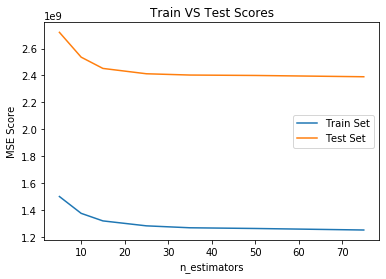

Minimun MSE for n_estimators is:  75


In [196]:
n_estimators = [5, 10, 15, 25, 35, 50, 75]
mse_err_tr=[]
mse_err_ts=[]
for ne in n_estimators:
    rf=RandomForestRegressor(max_depth=15,min_samples_leaf=5,n_estimators=ne,max_features=0.7,random_state=42,n_jobs=-1)
    rf.fit(train_x,train_y)
    print("max_features  :"+str(ne))
    
    #on train data
    rf_predict=rf.predict(train_x)
    Err=mean_squared_error(train_y,rf_predict)
    print("MSE score on train: "+str(Err))
    mse_err_tr.append(Err)
    
    #on test data
    rf_predict=rf.predict(test_x)
    Err=mean_squared_error(test_y,rf_predict)
    print("MSE score on test: "+str(Err))
    mse_err_ts.append(Err)
    
plot_hyper(n_estimators,mse_err_tr,mse_err_ts,"n_estimators")

In [198]:
RFR = RandomForestRegressor()
parameters = [{"max_depth":[14,15,16],"min_samples_leaf":[1,5,10],"max_features":[0.5,0.675,0.6],"n_estimators":[30]}]
GCV=GridSearchCV(RFR, parameters, cv=3)
GCV.fit(train_x, train_y)
bestrf = GCV.best_estimator_

In [199]:
bestrf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
                      max_features=0.675, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [202]:
pred=GCV.predict(test_x)
err = mean_squared_error(pred, test_y)

print("Random Forest tuned RMSE: ",np.sqrt(err))

Random Forest tuned RMSE:  48884.13168270959


In [203]:
rf = RandomForestRegressor(max_depth=16, max_features=0.675,min_samples_leaf=1,n_estimators=30, n_jobs=None,random_state=1)

In [209]:
x=df.drop(["median_house_value", "income_cat"], axis=1)

In [216]:
rf.fit(train_x, train_y)
feature_importances = pd.DataFrame(rf.feature_importances_,index = x.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,median_income,0.402857
1,ocean_proximity_INLAND,0.167827
2,population_per_household,0.112006
3,longitude,0.064614
4,latitude,0.058596
5,bedrooms_per_room,0.053787
6,rooms_per_household,0.042177
7,housing_median_age,0.040793
8,total_rooms,0.012729
9,population,0.012114


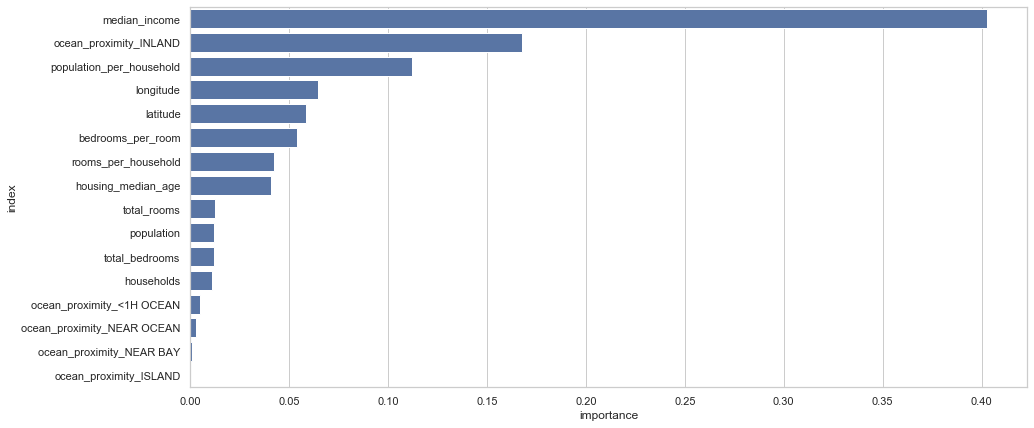

In [222]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,7))
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="b")

**Observation:** We can drop some of the less useful features (e.g., apparently only one ocean_proximity category is really useful

#### Findings
1. Overall the main predictor feature is "median income".We used the feature engineer certain features which could provide huge impact in the score.
2. Population was seen to a good predictor logically,but turns out it has high dependence on population per household.